<a href="https://colab.research.google.com/github/agibayrashitnu/Deep-Learning/blob/main/CNN_for_predicting_the_bank_customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and Setup

In [63]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [64]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.13.0


# Importing dataset from kaggle to Google Colab

In [65]:
# install kaggle API
!pip install -q kaggle

In [66]:
# Creating a directory as kaggle

!mkdir -p ~/.kaggle

In [67]:
# Importing kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [68]:
# Copy API key to kaggle directory

!cp kaggle.json ~/.kaggle/

In [69]:
! chmod 600 /root/.kaggle/kaggle.json

In [70]:
#list of the datasets that can be downloaded from kaggle
!kaggle datasets list

ref                                                        title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023              47KB  2023-08-26 11:04:57          10330        337  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target  Zzzs: Lightweight training dataset + target  185MB  2023-09-18 18:16:21            358         50  1.0              
muhammadtalhaawan/world-export-and-import-dataset          World Export & Import Dataset (1989 - 2023)  721KB  2023-09-09 18:59:41           1143         32  1.0              
josephinelsy/spotify-top-hit-playlist-2010-2022            Spotify Top Hit Playlist (2010-2022)         210KB  2023-09-0

In [71]:
# Importing the dataset from Kaggle
! kaggle competitions download -c santander-customer-satisfaction

santander-customer-satisfaction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [72]:
#unzip datasets
!unzip /content/santander-customer-satisfaction.zip

In [73]:
dataset = pd.read_csv('/content/train.csv')

In [74]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Data Preprocessing

In [75]:
dataset.shape

(76020, 371)

In [76]:
#independent variables or matrix of features
x = dataset.drop(labels = ['ID','TARGET'], axis = 1)

In [77]:
x.shape

(76020, 369)

In [78]:
y = dataset.TARGET #dataset['TAEGET']

In [79]:
y

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

In [80]:
y.shape

(76020,)

In [81]:
# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 0)

In [82]:
x_train.shape, x_test.shape

((60816, 369), (15204, 369))

# Remove constant, quasi constant and duplicate features

In [83]:
from sklearn.feature_selection import VarianceThreshold


In [84]:
rm_f = VarianceThreshold(threshold = 0.01)
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [85]:
x_train.shape, x_test.shape

((60816, 266), (15204, 266))

In [86]:
# remove duplicate features

x_train_t = x_train.transpose()
x_test_t = x_test.transpose()

In [87]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [88]:
x_train_t.shape, x_test_t.shape

((266, 60816), (266, 15204))

In [89]:
#number of duplicate features
x_train_t.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [90]:
x_train_t.duplicated().sum()

16

In [91]:
duplicated_features = x_train_t.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [92]:
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [93]:
x_train = x_train_t[features_to_keep].T

In [94]:
x_test = x_test_t[features_to_keep].T

In [95]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [96]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [97]:
x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [98]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [99]:
#reshape the dataset
x_train = x_train.reshape(60816,250,1)
x_test = x_test.reshape(15204,250,1)

In [100]:
x_train.shape, x_test.shape

((60816, 250, 1), (15204, 250, 1))

In [101]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Building the model


In [102]:
model = tf.keras.models.Sequential()

In [103]:
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3,
                                 activation = 'relu', input_shape=(250,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))

In [104]:
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size =2))
model.add(tf.keras.layers.Dropout(0.5))

In [105]:
model.add(tf.keras.layers.Conv1D(filters = 128, kernel_size = 3,activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.5))

In [106]:
model.add(tf.keras.layers.Flatten())

In [107]:
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [108]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 248, 32)           128       
                                                                 
 batch_normalization_4 (Bat  (None, 248, 32)           128       
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 124, 32)           0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 124, 32)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 122, 32)           3104      
                                                                 
 batch_normalization_5 (Bat  (None, 122, 32)          

In [110]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.00005)

In [111]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the Model

In [112]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

1901/1901 [==============================] - 29s 8ms/step - loss: 0.2402 - accuracy: 0.9498 - val_loss: 0.1995 - val_accuracy: 0.9582
Epoch 2/10
1901/1901 [==============================] - 16s 8ms/step - loss: 0.1767 - accuracy: 0.9597 - val_loss: 0.1892 - val_accuracy: 0.9582
Epoch 3/10
1901/1901 [==============================] - 15s 8ms/step - loss: 0.1676 - accuracy: 0.9607 - val_loss: 0.1834 - val_accuracy: 0.9583
Epoch 4/10
1901/1901 [==============================] - 16s 8ms/step - loss: 0.1648 - accuracy: 0.9608 - val_loss: 0.1731 - val_accuracy: 0.9583
Epoch 5/10
1901/1901 [==============================] - 17s 9ms/step - loss: 0.1625 - accuracy: 0.9609 - val_loss: 0.1756 - val_accuracy: 0.9583
Epoch 6/10
1901/1901 [==============================] - 16s 8ms/step - loss: 0.1617 - accuracy: 0.9609 - val_loss: 0.1711 - val_accuracy: 0.9583
Epoch 7/10
1901/1901 [==============================] - 21s 11ms/step - loss: 0.1582 - accuracy: 0.9610 - val_loss: 0.1672 - val_accuracy: 0.

In [113]:
y_pred = model.predict(x_test).round()

476/476 [==============================] - 1s 2ms/step


In [114]:
print(y_pred[0]), print(y_test[0])

[0.]
0


(None, None)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14570     0]
 [  634     0]]


In [116]:
acc_cm = accuracy_score(y_test,y_pred)

In [117]:
print(acc_cm)

0.9583004472507235


In [122]:
def learning_curve(history, epochs):

  epoch_range = range(1,epochs+1)

  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy score')
  plt.legend(['Train', 'Val'], loc = 'upper right')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

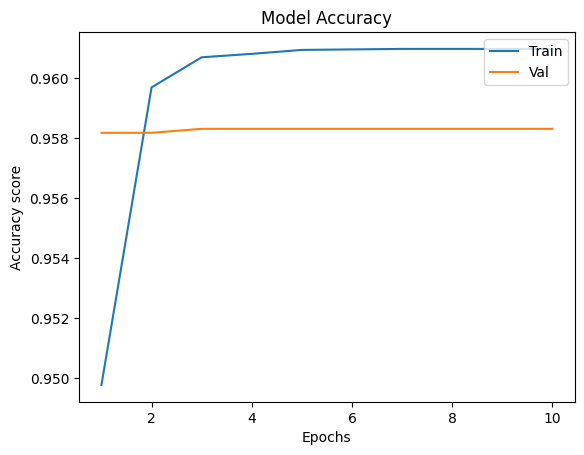

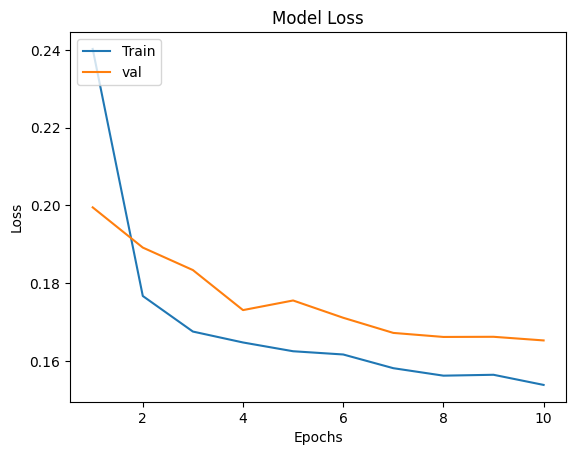

In [123]:
learning_curve(history, 10)